In [2]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from networks import Generator


base_path = rf"E:\courses\16824\hw2\gan"
ckpt_names = [rf"data_gan\generator.pt", rf"data_ls_gan\generator.pt", rf"data_wgan_gp\generator.pt"]

device = 'cuda' if torch.cuda.is_available() else "cpu"

gens = [
    torch.jit.load(os.path.join(base_path, ckpt_name), map_location=device).to(device)
    for ckpt_name in ckpt_names
]

In [3]:
def interpolate_latent_space(gen: Generator):
    with torch.no_grad():
        combinations = torch.tensor([[i, j] for i in torch.linspace(-1, 1, 10) for j in torch.linspace(-1, 1, 10)])
        samples = torch.cat((combinations, torch.zeros(100, 126)), dim=1).to('cuda')

        generated = (gen.forward_given_samples(samples) + 1) / 2

    grid = torchvision.utils.make_grid(generated, nrow=10)

    plt.figure(figsize=(12, 9))
    plt.axis("off")
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.show()

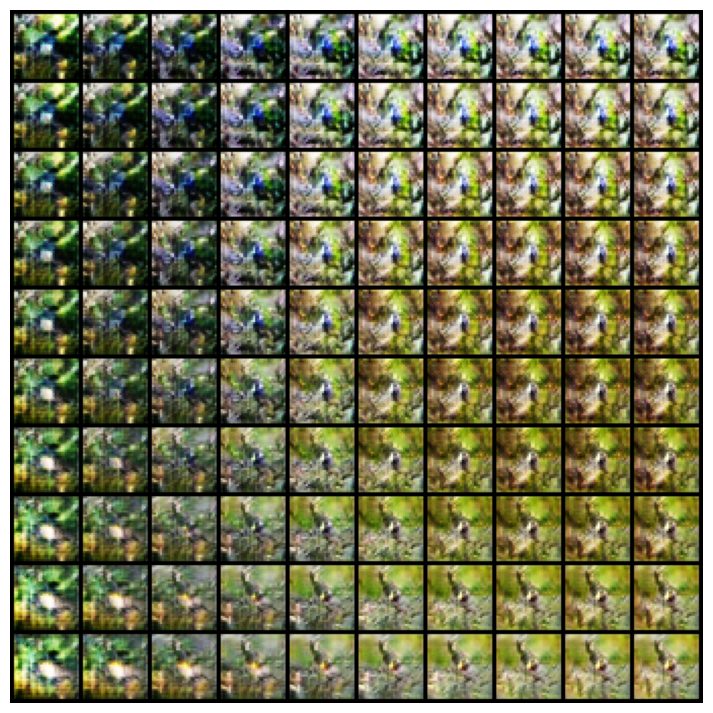

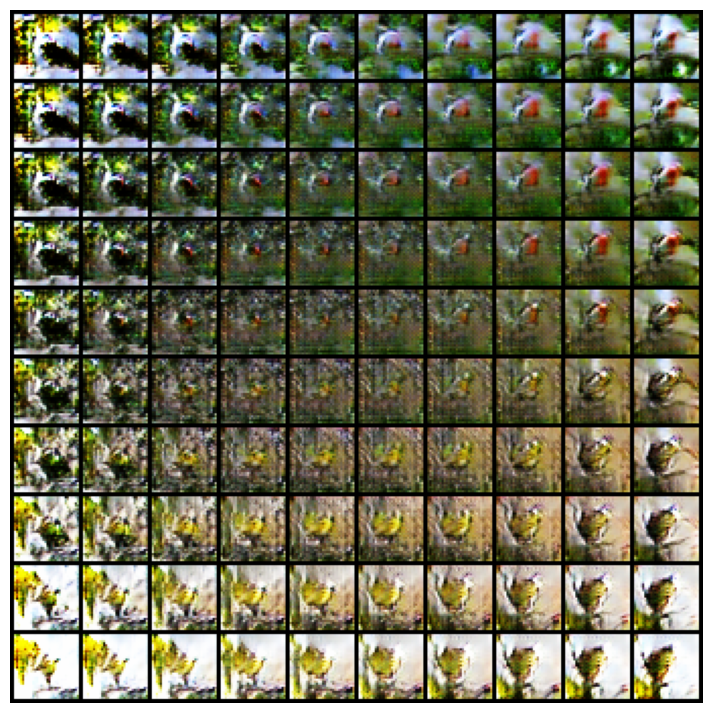

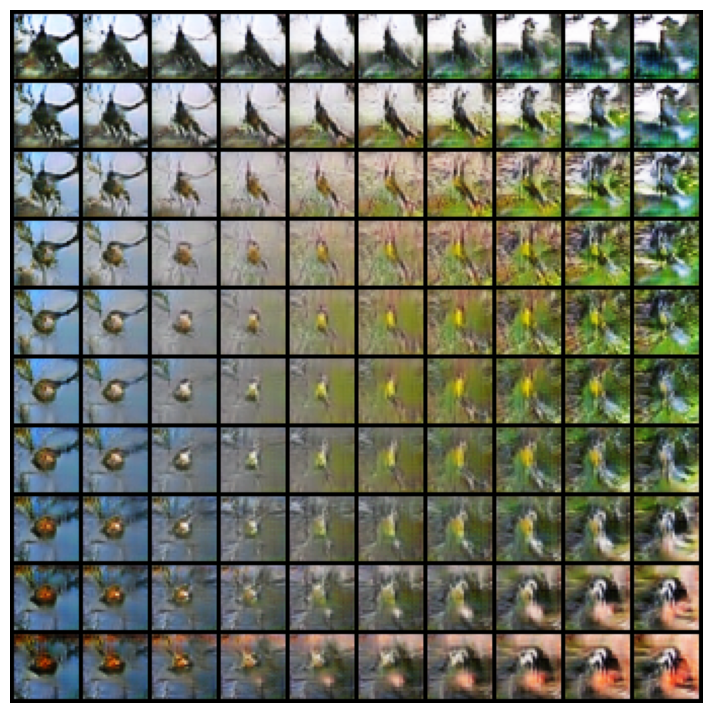

[None, None, None]

In [4]:
list(map(interpolate_latent_space, gens))

In [5]:
def interpolate_latent_space_advanced(gen: Generator, coloums_to_permute):
    with torch.no_grad():
        combinations = torch.tensor([[i, j] for i in torch.linspace(-1, 1, 10) for j in torch.linspace(-1, 1, 10)]).cuda()
        
        samples = torch.randn(1, 128).repeat(100, 1).cuda()
        samples[:, coloums_to_permute] = combinations

        generated = (gen.forward_given_samples(samples) + 1) / 2
    grid = torchvision.utils.make_grid(generated, nrow=10)

    plt.figure(figsize=(12, 9))
    plt.axis("off")
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.show()

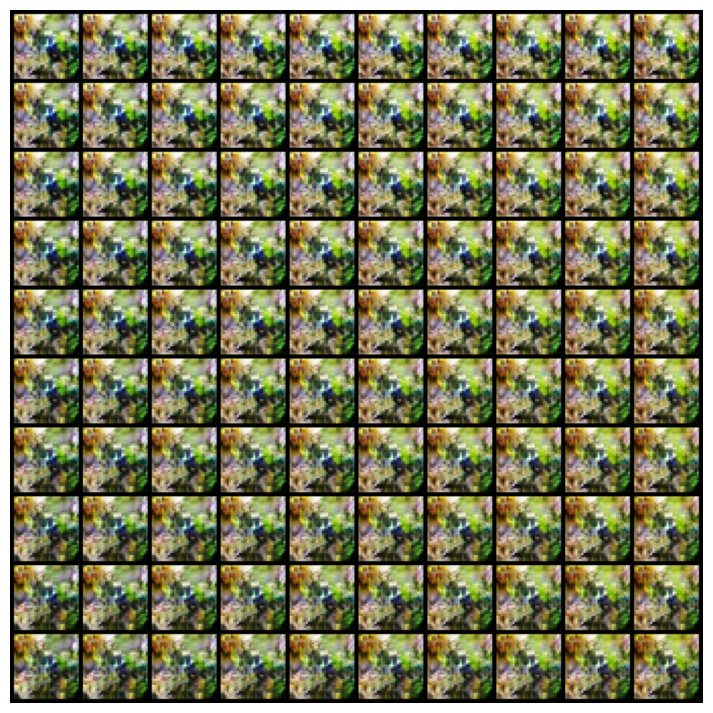

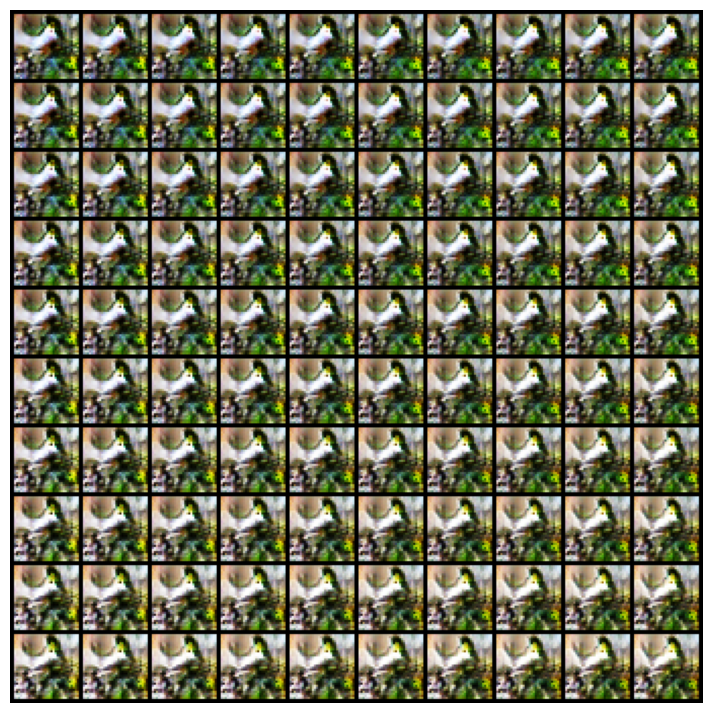

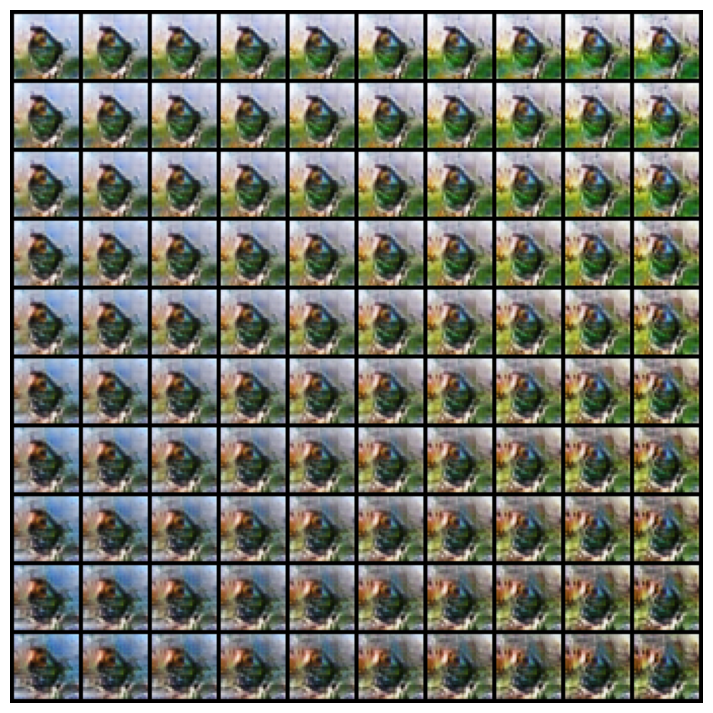

[None, None, None]

In [7]:
coloums_to_permute = [0, 1]
list(map(interpolate_latent_space_advanced, gens, [coloums_to_permute]*3))